# **Using open cv for live detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')\

Mounted at /content/drive


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename,binary

In [ ]:
import keras
from keras.optimizers import Adam
import cv2
import numpy as np

  
def predict_image():
  filename,binary = take_photo()
  print('Saved to {}'.format(filename))
  AGE=['0-2','4-6','8-13','15-20','25-32','38-43','48-53','60+']
  model1 = keras.models.load_model(r"/content/drive/MyDrive/Project/gender_model")
  model1.load_weights(r"/content/drive/MyDrive/Project/modelg_weights.h5")
  model1.compile(optimizer = keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])
  model2 = keras.models.load_model(r"/content/drive/MyDrive/Project/age_model")
  model2.load_weights(r"/content/drive/MyDrive/Project/modela_weights.h5")
  model2.compile(optimizer = keras.optimizers.RMSprop(lr=0.0001), loss = 'sparse_categorical_crossentropy',metrics = ['acc'])
  image = cv2.imread(r'/content/photo.jpg')
  image = cv2.resize(image  , (224 , 224))
  image = image[np.newaxis, :, :,:]
  gender = model1.predict(image)
  if gender[0]<0.5:
    pred_gen='Female'
  else:
    pred_gen='Male'

  age = model2.predict(image)

  return pred_gen,AGE[age.argmax()]


In [ ]:
predict_image()

<IPython.core.display.Javascript object>

Saved to photo.jpg


('Male', '25-32')

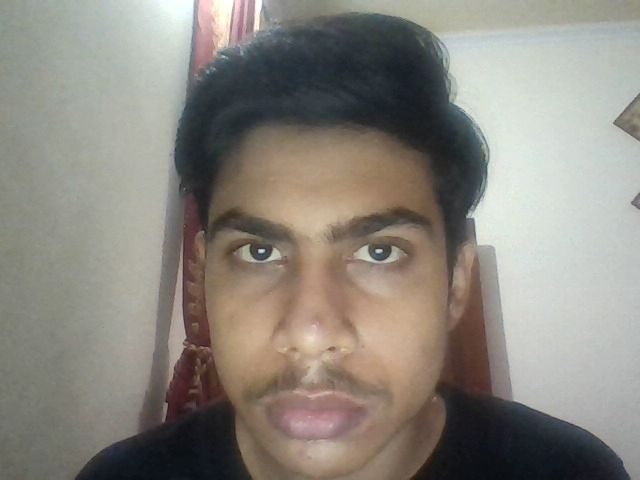

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(r'/content/photo.jpg')
cv2_imshow(img)